In [2]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Bayesian-Theory" data-toc-modified-id="-Bayesian-Theory-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font face="gotham" color="orange"> Bayesian Theory</font></a></span></li></ul></div>

Bayesian is not the opposite of frequentist, but it holds a constrasting view comparing with frequentists.

In the first chapter, we review Bayes' Theorem and give an overview of application in statistics and econometrics.

If all you want know is what Bayesian methods are, this is the only chapter you need to read.

# <font face="gotham" color="orange"> Bayesian Theory </font>

The bayesian theory is built upon the most famous **Bayes' Theorem**, which is derived from condition probability and joint probability.

The **law of joint probability** says that
$$
P(x, y)=P(x \mid y) P(y)
$$
or 
$$
P(x, y)=P(y \mid x) P(x)
$$
Combine them, we will obtain the formula of Bayes' Theorem.
$$
P(x \mid y)=\frac{P(y \mid x) P(x)}{P(y)}
$$

To make it meaningful in the context of statistics/econometrics, replace the symbols will provide a refreshing view
$$
P(\theta \mid Y)=\frac{P(Y \mid \theta) P(\theta)}{P(Y)}
$$
where $Y$ is the data, $\theta$ is the vector of parameters you would like to make inferrence. The formula summarizes what we know about $\theta$ about having seen the sample of observations on $Y$.

In Bayesian terms
\begin{align}
\text{prior:}&\ P(\theta)\\
\text{likelihood:}&\ P(Y|\theta)\\
\text{marginal likelihood:}&\ P(Y)\\
\text{posterior:}&\ P(\theta|Y)\\
\end{align}

To update prior beliefs into posterior beliefs conditional on observaed data, the process is called **Bayesian Inference**.

More often, we ignore $P(Y)$ due to its irrelevance to $\theta$, the formula simplies into
$$
P(\theta \mid Y) \propto P(Y \mid \theta) P(\theta)
$$

# <font face="gotham" color="orange"> Model Comparison </font>

If you have multiple models in mind, Bayesian framework can provide model comparison too. Suppose we have $m$ different models, $M_i$ for $i=1, ..., m$, the posterior for the parameters claculated using $M_i$ is 
$$
P\left(\theta^{i} \mid Y, M_{i}\right)=\frac{P\left(Y \mid \theta^{i}, M_{i}\right) P\left(\theta^{i} \mid M_{i}\right)}{P\left(Y \mid M_{i}\right)}
$$

We use $i$ to signal that for each model has its own posterior, likelihood and prior.

However, to compare models, we need to use evaluate the **posterior model probability**
$$
\operatorname{P}\left(M_{i} \mid Y\right) \propto P\left(Y \mid M_{i}\right) \operatorname{P}\left(M_{i}\right),
$$

If we have two models, we can construct the **posterior odds ratio** as
$$
\frac{P\left(M_{1} \mid Y\right)}{P\left(M_{2} \mid Y\right)}=\frac{P\left(Y \mid M_{1}\right)}{P\left(Y \mid M_{2}\right)} \frac{P\left(M_{1}\right)}{P\left(M_{2}\right)}
$$
Specifically, this part is called **Bayes factor**
$$
BF_{12}=\frac{P\left(Y \mid M_{1}\right)}{P\left(Y \mid M_{2}\right)} 
$$
which is a the ratio of _marginal likelihoods_ for model $1$ and model $2$. Furthermore, marginal likelihood can be decomposed into
$$
P\left(Y \mid M_{i}\right)=\int_{\theta_{i}} P\left(Y \mid \theta_{i}, M_{i}\right) P\left(\theta_{i} \mid M_{i}\right) d \theta_{i}
$$

# <font face="gotham" color="orange"> Bernoulli Example </font>

An example will help clarify how we use the Bayes' Theorem for inference and prediction. 

The Bernoulli pmf is commonly written as
$$
f(k; p) = p^{k}(1-p)^{1-k}\ \text{ for }\ \ k\in \{0, 1\}
$$
Watch out the notation that $k$ equals either $0$ or $1$, not $k \in (0, 1)$.

The meaning of $0$ and $1$ usually represents "happened" and "not happened". Not suppose we have collects a sample of $K= (k_1, k_2, k_3,...,k_T)$. 

The joint Bernoulli pmf is 
$$
f(K|p)=p^{k_1}(1-p)^{1-k_1}p^{k_2}(1-p)^{1-k_2}p^{k_3}(1-p)^{1-k_3}...p^{k_T}(1-p)^{1-k_T}=p^{\sum_{i=0}^T k_i}(1-p)^{T-\sum_{i=0}^T k_i}
$$

which is the **likelihood function** given all possible $p$.

Naturally, we need prior too.

The onf of most frequently used prior in Bayesian inference is **Beta distribution**, because it models the probability of a probability. 

For instance, you can ask a question, what's the probability that a random person has diabetes? You could give an educated guess around $30\%$, then you go to collect data on the street that asking random person provide a blood sample test.

Recall that we have mentioned pdf of Beta distribution
\begin{equation}
f(p, \alpha, \beta)=\frac{\Gamma(\alpha+b) p^{\alpha-1}(1-p)^{\beta-1}}{\Gamma(\alpha) \Gamma(\beta)}
\end{equation}
However in Bayesian inference, we usually combine those gamma functions into a beta function term.
\begin{equation}
f(p, \alpha, \beta)=\frac{1}{B(\alpha, \beta)} p^{\alpha-1}(1-p)^{\beta-1}
\end{equation}
where subscript $0$ represent **prior**.

Posterior is straightforward by evoking Bayes' Theorem.
$$
f(p|K) \propto \left(p^{\sum_{i=0}^T k_i}(1-p)^{T-\sum_{i=0}^T k_i}\right)\frac{1}{B(\alpha_0, \beta_0)} p^{\alpha_0-1}(1-p)^{\beta_0-1}
$$
Since we have already using $\propto$, we just need to keep the kernal of beta distribution, which simplies to
$$
f(p|K) \propto \left(p^{\sum_{i=0}^T k_i}(1-p)^{T-\sum_{i=0}^T k_i}\right) p^{\alpha_0-1}(1-p)^{\beta_0-1}
$$
Collect terms we have the kernal of posterior distribution, which is also a beta distribution.
$$
f(p|K) \propto p^{\sum_{i=0}^T k_i+\alpha_0-1}(1-p)^{T-\sum_{i=0}^T k_i+\beta_0-1}
$$

We will see more detailed examples in next chapter, we just derived posterior analytically by using **conjugate prior**. It makes posterior takes the same function form as prior, but with updated parameters. In this case the posterior parameters are
$$
\alpha=\sum_{i=0}^T k_i+\alpha_0\\
\beta=T-\sum_{i=0}^T k_i+\beta_0
$$

Let's give some meaning to the example. 

The beta distribution here models our prior belief, let's say the parameters are set as
$$
\alpha_0 = 4\\
\beta_0 = 7
$$
The sample is 
$$
K= (1, 0, 0, 0, 1, 0, 1, 1, 0, 0)
$$
which indicates $T=10$. Therefore the posterior parameters are
$$
\alpha = 4+4=8\\
\beta=10-4+7=13
$$
Plot prior and posterior together. 

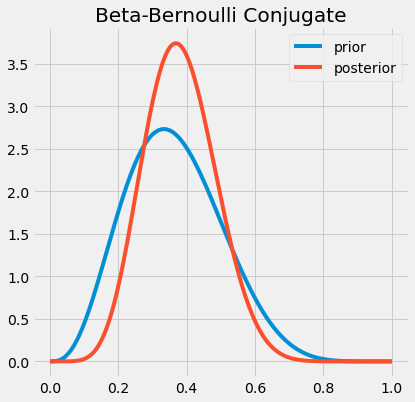

In [12]:
x_beta = np.linspace(0, 1, 200)
y_beta_prior = sp.stats.beta(a=4, b=7).pdf(x_beta)
y_beta_posterior = sp.stats.beta(a=8, b=13).pdf(x_beta)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x_beta, y_beta_prior, label='prior')
ax.plot(x_beta, y_beta_posterior, label='posterior')
ax.set_title('Beta-Bernoulli Conjugate')
ax.legend()
plt.show()

## <font face="gotham" color="orange"> Reporting Results  </font>

We can provide numerical features of posterior distribution such as mean and standard deviation as **point estimates**. Because the posterior are not simulated, we have formula for mean and variance which can be found from any textbook or Wikipedia.
$$
\mathrm{E}[X]=\frac{\alpha}{\alpha+\beta}\\
\operatorname{var}[X]=\frac{\alpha \beta}{(\alpha+\beta)^{2}(\alpha+\beta+1)}
$$

In [41]:
a, b = 8, 13
mean_post = a/(a+b)
std_post =  (a*b)/((a+b)**2*(a+b+1))
print('mean of posterior: {}'.format(mean_post))
print('std of posterior: {}'.format(std_post))

mean of posterior: 0.38095238095238093
std of posterior: 0.010719439290867862


Reporting **Bayesian Credible Interval** is also a common statistic that automatically provided in some statistic softwares. The Bayesian Credible Interval differs the Frequentist Confidence Interval mostly in a philosophical sense.

Frequentists assume the parameters are fixed but confidence intervals are random, so $95\%$ confidence interval means if the experiement repeats $100$ times, there are round $95$ times the confidence interval will include the true parameter. 

However Bayesian holds a contrasting view that parameters are random, but the credible intervals are fixed. As an example, the shaded are is the $95\%$ credible interval. It indicates that there is $95\%$ chance the interval include the true parameter.

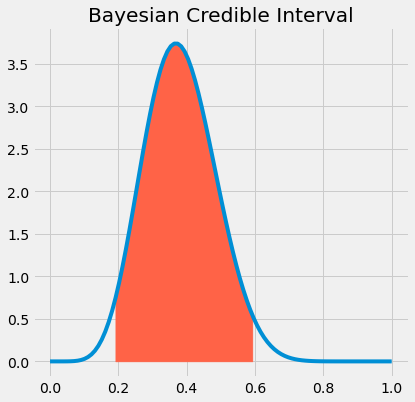

In [39]:
lb = sp.stats.beta(a=8, b=13).ppf(.025)
ub = sp.stats.beta(a=8, b=13).ppf(.975)
x_ci = np.linspace(lb, ub, 100)
y_ci = sp.stats.beta(a=8, b=13).pdf(x_ci)

x_beta = np.linspace(0, 1, 100)
y_beta_posterior = sp.stats.beta(a=8, b=13).pdf(x_beta)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x_beta, y_beta_posterior)
ax.fill_between(x_ci, y_ci, color='tomato')

ax.set_title('Bayesian Credible Interval')
plt.show()